Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

### Uncomment to read images from Google Drive

In [2]:
## If you are using the data by mounting the google drive, use the following :

#from google.colab import drive
#drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("gdrive/My Drive/UpgradExer5CNNSkin/SkinImg/Train/")
# data_dir_test = pathlib.Path('gdrive/My Drive/UpgradExer5CNNSkin/SkinImg/Test')

data_dir_train = pathlib.Path("./UpgradExer5CNNSkin/SkinImg/Train/")
data_dir_test = pathlib.Path('./UpgradExer5CNNSkin/SkinImg/Test')


### Train (split for Validation data) and Test data set

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

#train_ds = ##todo

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### List of classes

In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
#len = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


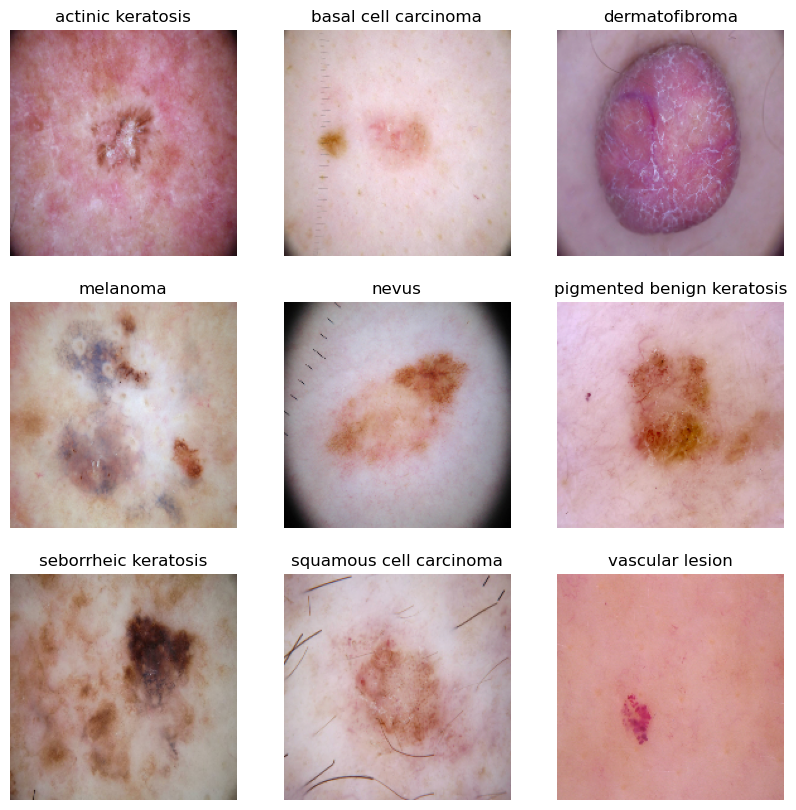

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
    
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i)).take(1)
    for images, labels in filtered_ds:
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
# model = tf.keras.Sequential([
#  tf.keras.layers.Rescaling(1./255),
#  tf.keras.layers.Conv2D(32, 3, activation='relu'),
#  tf.keras.layers.MaxPooling2D(),
#  tf.keras.layers.Dropout(0.1),
#  tf.keras.layers.Conv2D(32, 3, activation='relu'),
#  tf.keras.layers.MaxPooling2D(),
#  tf.keras.layers.Dropout(0.1),
#  tf.keras.layers.Conv2D(32, 3, activation='relu'),
#  tf.keras.layers.MaxPooling2D(),
#  tf.keras.layers.Dropout(0.1),
#  tf.keras.layers.Flatten(),
#  tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dense(num_classes)
#  tf.keras.layers.Dropout(0.1)
# ])

num_classes = 9

model = Sequential()
model.add(Conv2D(16,3,padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(num_classes))
model.add(Dropout(0.1))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [14]:
# Training and Validation happens Parallel in Batches (epouch). 
# As long as the training accuracy gets better we can let the iterations continue. 
# In case the training is not accurate we can retune the model

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 52s 782ms/step - loss: 51.3184 - accuracy: 0.2394 - val_loss: 2.1039 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - 42s 747ms/step - loss: 1.8411 - accuracy: 0.3549 - val_loss: 1.9932 - val_accuracy: 0.2483
Epoch 3/20
56/56 [==============================] - 42s 752ms/step - loss: 1.7231 - accuracy: 0.3973 - val_loss: 2.1288 - val_accuracy: 0.2215
Epoch 4/20
56/56 [==============================] - 42s 747ms/step - loss: 1.6806 - accuracy: 0.4129 - val_loss: 1.9054 - val_accuracy: 0.3445
Epoch 5/20
56/56 [==============================] - 42s 757ms/step - loss: 1.5984 - accuracy: 0.4291 - val_loss: 2.0002 - val_accuracy: 0.3333
Epoch 6/20
56/56 [==============================] - 43s 763ms/step - loss: 1.5526 - accuracy: 0.4487 - val_loss: 1.9125 - val_accuracy: 0.3199
Epoch 7/20
56/56 [==============================] - 44s 781ms/step - loss: 1.4952 - accuracy: 0.4682 - val_loss: 1.9445 - val_accuracy: 0.335

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 45, 45, 32)        0

### Visualizing training results

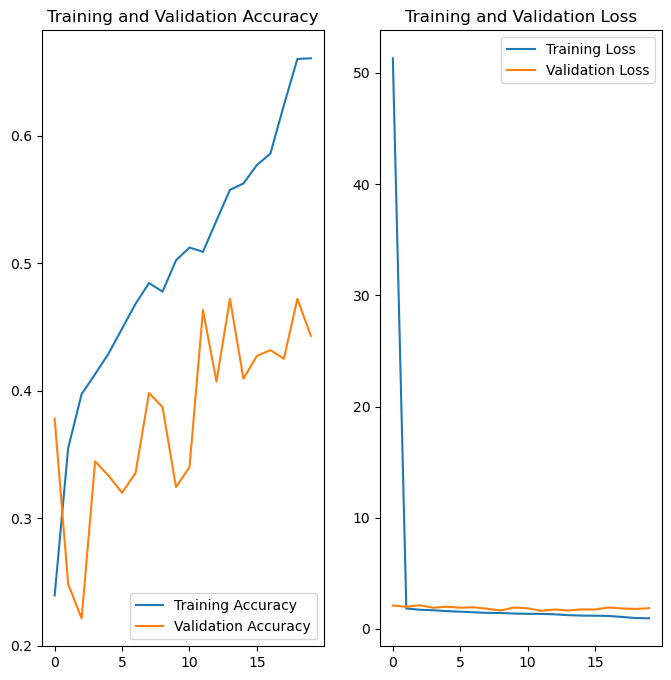

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


### Training accuracy is around 60% while Validation accuracy stops around 45%. Use of DropOut has reduced Overfitting. Need to boost validation accuracy using data augmentation. Image Rotation & flipping incorporated.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

### A Sample image with image rotation

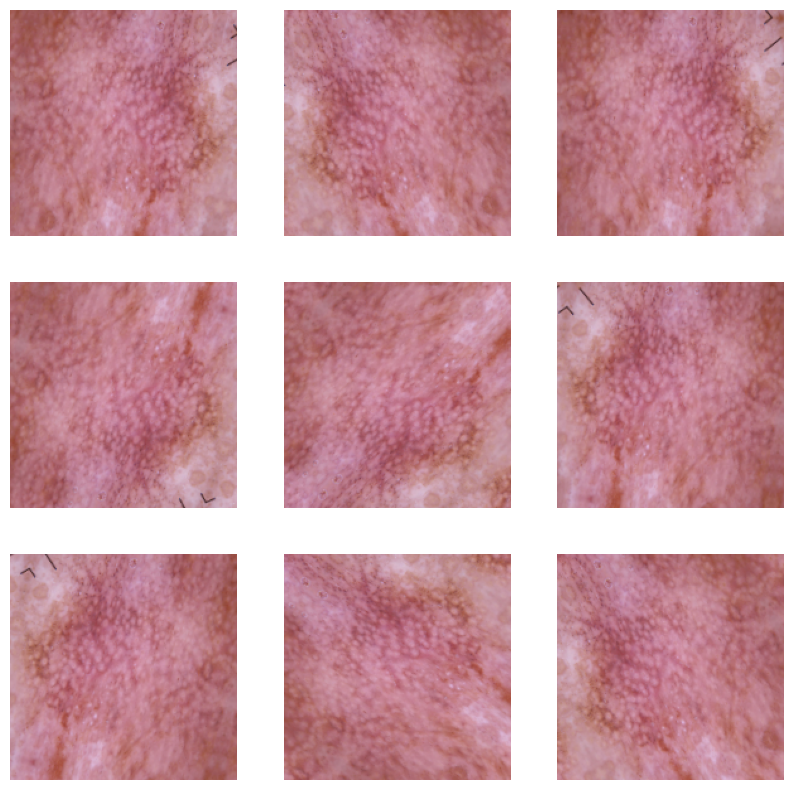

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

#image = tf.cast(tf.expand_dims(image_batch, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image_batch)
  ax = plt.subplot(3, 3, i + 1)
  #plt.imshow(augmented_image[0])
  plt.imshow((augmented_image[0]).numpy().astype(np.uint8))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()
model.add(Conv2D(16,3,padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(num_classes))

### Compiling the model

In [20]:
## Your code goes here

model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 40s 706ms/step - loss: 33.5445 - accuracy: 0.2779 - val_loss: 1.6129 - val_accuracy: 0.4206
Epoch 2/20
56/56 [==============================] - 38s 683ms/step - loss: 1.5482 - accuracy: 0.4470 - val_loss: 1.7805 - val_accuracy: 0.3512
Epoch 3/20
56/56 [==============================] - 37s 666ms/step - loss: 1.4616 - accuracy: 0.4983 - val_loss: 1.5813 - val_accuracy: 0.4541
Epoch 4/20
56/56 [==============================] - 37s 667ms/step - loss: 1.2441 - accuracy: 0.5653 - val_loss: 1.5885 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 40s 710ms/step - loss: 1.1469 - accuracy: 0.6032 - val_loss: 1.5691 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 41s 738ms/step - loss: 0.9985 - accuracy: 0.6568 - val_loss: 1.7483 - val_accuracy: 0.4720
Epoch 7/20
56/56 [==============================] - 37s 665ms/step - loss: 0.9072 - accuracy: 0.6858 - val_loss: 1.7251 - val_accuracy: 0.485

In [22]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,

  image_size = (img_height, img_width),
  batch_size = batch_size)

loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

Found 118 files belonging to 9 classes.
4/4 [==============================] - 5s 164ms/step - loss: 5.7768 - accuracy: 0.2966
Accuracy 0.29661017656326294


### Visualizing the results

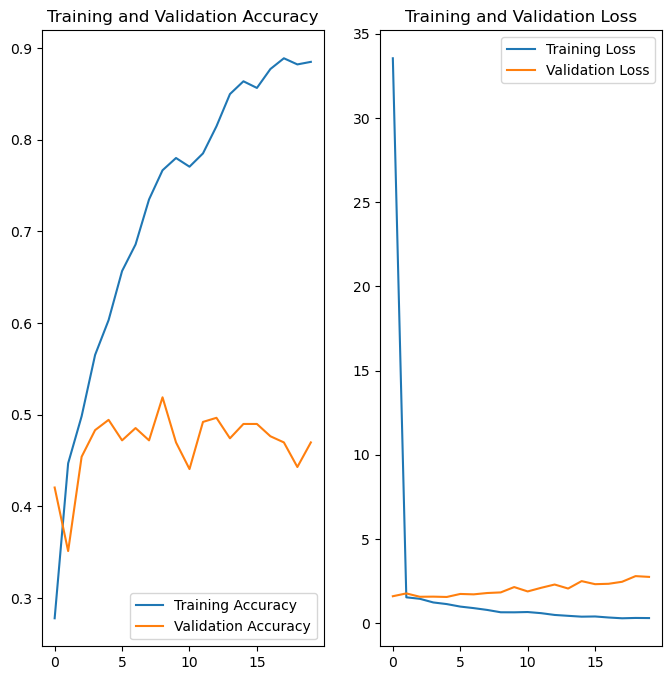

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Training accuracy has improved. But Validation accuracy is still low. So its still overfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.

from glob import glob
train_image_names = glob(r'./UpgradExer5CNNSkin/SkinImg/Train/*/*.jpg')
print("Total number of training images: ", len(train_image_names))

#print(train_image_names)
# make train_image_names as serie object
train_image_names = pd.Series(train_image_names)

# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split("\\")[-1])

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: (img_name.split("\\")[-2]))

train_df.head()

class_id_distribution = train_df['ClassId'].value_counts()
class_id_distribution.head(10)

Total number of training images:  2239


pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: ClassId, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


### Least Samples in seborrheic keratosis           77
### Following classes dominate
##### pigmented benign keratosis    462
##### melanoma                      438
##### basal cell carcinoma          376
##### nevus                         357

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
#!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="./UpgradExer5CNNSkin/SkinImg/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC826DA3A0>: 100%|█| 500/500 [00:08<00:00, 56.70 Samples/


Initialised with 376 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1DC8265A430>: 100%|█| 500/500 [00:09<00:


Initialised with 95 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC84399130>: 100%|█| 500/500 [00:08<00:00, 55.97 Samples/


Initialised with 438 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x1DC8263CA60>: 100%|█| 500/500 [00:47<00:


Initialised with 357 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x1DC84230130>: 100%|█| 500/500 [00:45<00:00, 11.01 Sample


Initialised with 462 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC825AE850>: 100%|█| 500/500 [00:10<00:00, 49.06 Samples/


Initialised with 77 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1DC842CB760>: 100%|█| 500/500 [00:22<00:00, 22.65 Samples


Initialised with 181 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC84359D30>: 100%|█| 500/500 [00:09<00:00, 53.13 Samples/


Initialised with 139 image(s) found.
Output directory set to ./UpgradExer5CNNSkin/SkinImg/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC8432EEE0>: 100%|█| 500/500 [00:10<00:00, 49.91 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [29]:
lesion_list     = [os.path.basename((os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [30]:
dataframe_dict = dict(zip(path_list, lesion_list))
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [31]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\admin\AppData\Local\Temp\ipykernel_16544\739838753.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


### Distribution of data across classes including augmented data

In [32]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
data_dir_train=  "./UpgradExer5CNNSkin/SkinImg/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset =  'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
## your code goes here

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [38]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 159s 927ms/step - loss: 1.8898 - accuracy: 0.2717 - val_loss: 1.6057 - val_accuracy: 0.3846
Epoch 2/30
169/169 [==============================] - 149s 878ms/step - loss: 1.4960 - accuracy: 0.4375 - val_loss: 1.4491 - val_accuracy: 0.4736
Epoch 3/30
169/169 [==============================] - 148s 870ms/step - loss: 1.3066 - accuracy: 0.5070 - val_loss: 1.2650 - val_accuracy: 0.5434
Epoch 4/30
169/169 [==============================] - 144s 850ms/step - loss: 1.1501 - accuracy: 0.5746 - val_loss: 1.2830 - val_accuracy: 0.5256
Epoch 5/30
169/169 [==============================] - 155s 916ms/step - loss: 1.0435 - accuracy: 0.6226 - val_loss: 1.1470 - val_accuracy: 0.5694
Epoch 6/30
169/169 [==============================] - 146s 860ms/step - loss: 0.8895 - accuracy: 0.6738 - val_loss: 1.0483 - val_accuracy: 0.6340
Epoch 7/30
169/169 [==============================] - 153s 900ms/step - loss: 0.7768 - accuracy: 0.7253 - val_loss: 1.0870 -

#### **Todo:**  Visualize the model results

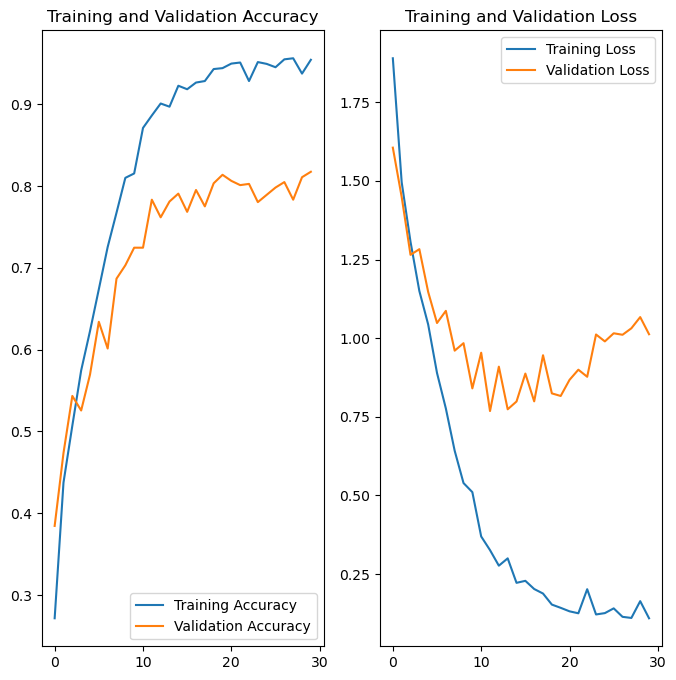

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size = (img_height, img_width),
  batch_size = batch_size)

loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

Found 118 files belonging to 9 classes.
4/4 [==============================] - 4s 229ms/step - loss: 8.4599 - accuracy: 0.3051
Accuracy 0.3050847351551056


### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

### Rebalancing the class must have helped address underfitting of few classes with very less data (images). 

### Overall Overfitting is addressed as we see the Validation Accuracy has increased.

In [41]:
from keras.preprocessing.image import ImageDataGenerator
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
 data_dir_test , # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)



Found 118 images belonging to 9 classes.


C:\Users\admin\AppData\Local\Temp\ipykernel_16544\2016176624.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [42]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [43]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.39      0.44      0.41        16
            dermatofibroma       0.67      0.12      0.21        16
                  melanoma       0.17      0.12      0.14        16
                     nevus       0.31      0.94      0.46        16
pigmented benign keratosis       0.39      0.56      0.46        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.29      0.12      0.17        16
           vascular lesion       0.67      0.67      0.67         3

                  accuracy                           0.33       118
                 macro avg       0.32      0.33      0.28       118
              weighted avg       0.32      0.33      0.27       118

